In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC

In [94]:
def generate_binary_dataset(min_value, max_value, size, positive_condition):
    data = pd.DataFrame(
        np.concatenate((
            np.random.uniform(min_value, max_value, (size, 2)),
            -np.ones((size, 1))), axis=1), 
        columns=['x', 'y', 'target'])
    data.target[positive_condition(data.x, data.y)] = 1
    return data

In [183]:
def plot_separator(svc):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svc.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, linewidth=1, label="support vectors", facecolors='none', edgecolors='k')

In [186]:
def plot_binary(data, svc=None):
    plt.figure(figsize=(10, 10))
    plt.scatter(data.x, data.y, c=data.target, label="data", s=30, cmap=plt.cm.Paired)
    
    if svc:
        plot_separator(svc)
    
    plt.grid()
    plt.legend()

In [187]:
dataset = generate_binary_dataset(-4, 4, 500, lambda x, y: x - y > 1)
dataset.head()

,x,y,target
0,-3.444194,-1.431584,-1.0
1,-1.700710,-1.726399,-1.0
2,3.085765,-0.863306,1.0
3,2.752059,-0.842234,1.0
4,0.452286,0.712687,-1.0


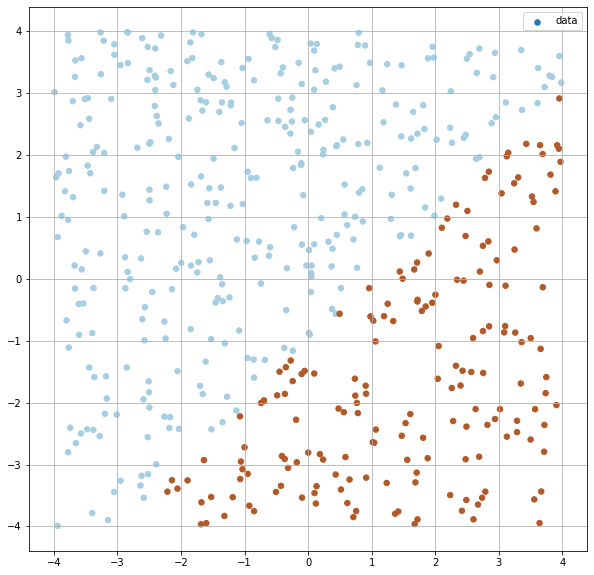

In [188]:
plot_binary(dataset)

In [189]:
model = SVC(kernel="linear")

In [190]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

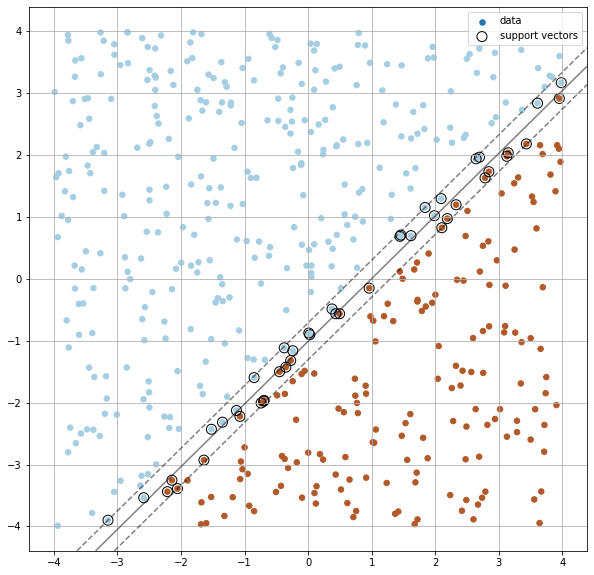

In [191]:
plot_binary(dataset, model)